<a href="https://colab.research.google.com/github/KevinCantrell/carbonDioxide/blob/main/CO2_CaCO3_Equilibrium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definitions of variables:
#####$x[0]=[CO_2]*$ call co2
#####$x[1]=[HCO_3^-]$ call bct
#####$x[2]=[CO_3^{2-}]$ call car
#####$x[3]=[H^+]$ call hdr
#####$x[4]=[OH^-]$ call hox
#####$x[5]=[Ca^{2+}]$ call cal

In [4]:
def PrintConcs(x):
    print('ppm = ',atm*1e6)
    print('atm = ',atm)
    print('co2 = ',x[0])
    print('bct = ',x[1])
    print('car = ',x[2])
    print('hdr = ',x[3])
    print('hox = ',x[4])
    if len(x)>5:
        print('cal = ',x[5])
    print('pH = ',-np.log10(x[3]))

# The CO2 only system
$Eq_{0}$ $\mathrm{\color{Teal} {CO_{2 \,(g)}} \rightleftharpoons \color{Purple} {CO_{2 \,(aq)}}}$ $\textrm{where K}_{\textrm{Hn}} \textrm{ is } 3.40×10^{−2} $

$\qquad \mathrm{\color{Purple} {CO_{2 \,(aq)}} \color{Black}{+ H_2O_{(l)} \rightleftharpoons} \color{DarkOrange}{H_2CO_{3 \,(aq)}} \rightleftharpoons \color{Red} {H^+_{(aq)}}  \color{Black}{+ \,}  \color{Darkgreen} {HCO^-_{3 \, (aq)}}}$ $\textrm{where K}_{\textrm{Hy}} \textrm{ is } 1.7×10^{−3} \textrm{ and K}_{\textrm{a1}}^{'} \textrm{ is } 2.6×10^{−4}$

$\qquad \textrm{Note: because }\mathrm{\color{Purple} {CO_{2 \,(aq)}} {>}\color{DarkOrange}{H_2CO_{3 \,(aq)}} }\textrm{ these uncharged species are combined and written as }  \mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} $

$\qquad \qquad \textrm{ where }\mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} = \mathrm{ \color{Purple} {CO_{2 \,(aq)}} + \color{DarkOrange}{H_2CO_{3 \,(aq)}}}$

$Eq_{1}$ $\mathrm{ \color{Purple}{CO^{*}_{2 \,(aq)}} \color{Black} + {H_2O_{(l)}}\rightleftharpoons \color{Red} {H^+_{(aq)}}  \color{Black}{+ \,}  \color{Darkgreen} {HCO^-_{3 \, (aq)}}} $ $\textrm{where K}_{\textrm{a1}} \textrm{ is } 4.46×10^{−7} $

$Eq_{2}$ $\mathrm{\color{Darkgreen} {HCO^-_{3 \, (aq)}} \rightleftharpoons \color{Red} {H^{+}_{(aq)}} \color{Black}{+ \,} \color{DarkBlue} {CO_{3 \, (aq)}^{2-}} }$ $\textrm{where K}_{\textrm{a2}} \textrm{ is } 4.69×10^{−11} $

$Eq_{3}$ $\mathrm{ \color{Black} {H_2O_{(l)} \rightleftharpoons \,} \color{Red}{H^{+}_{(aq)}} \color{Black}{+ \,} \color{Black} {OH^{-}_{(aq)}} } $ $\textrm{where K}_{\textrm{W}} \textrm{ is } 1.00×10^{−14} $



$
  \begin{bmatrix}
  \mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} & \mathrm{\color{Darkgreen}{HCO^-_{3 \, (aq)}}} & \mathrm{\color{DarkBlue} {CO_{3 \, (aq)}^{2-}}} & \mathrm{\color{Red}{H^{+}_{(aq)}}} & \mathrm{\color{Black} {OH^{-}_{(aq)}}}\\
  \end{bmatrix}
$

$
  \begin{bmatrix}
  \mathrm{\color{Purple}{X_{0}}} &  &  &  & \\
  \mathrm{\color{Purple}{X_{0}}} & \mathrm{\color{Darkgreen}{X_{1}}} &  & \mathrm{\color{Red}{X_{3}}} & \\
  & \mathrm{\color{Darkgreen}{X_{1}}} & \mathrm{\color{DarkBlue} {X_{2}}} & \mathrm{\color{Red}{X_{3}}} & \\
  &  &  & \mathrm{\color{Red}{X_{3}}} & \mathrm{\color{Black} {X_{4}}}\\
  & \mathrm{\color{Darkgreen}{X_{1}}} & \mathrm{\color{DarkBlue} {X_{2}}} & \mathrm{\color{Red}{X_{3}}} & \mathrm{\color{Black} {X_{4}}}\\
  \end{bmatrix}=
  \begin{bmatrix} \mathrm{K_{H}^{ }*\color{teal}{P}} \\ \mathrm{K_{a1}^{ }} \\ \mathrm{K_{a2}^{ }} \\ \mathrm{K_{W}^{ }} \\ \mathrm{CB}_{ }^{ }  \end{bmatrix}
  =
  \begin{bmatrix} 3.40×10^{−2} *  \mathrm{\color{teal}{P}} \\ 4.46×10^{−7} \\ 4.69×10^{−11} \\ 1.00×10^{−14} \\ 0  \end{bmatrix}
$


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve

Kh=3.40e-2      #Kh  = co2/atm      = x[0]/atm
Ka1=4.46e-7     #Ka1 = hdr*bct/co2  = x[3]*x[1]/x[0]
Ka2=4.69e-11    #Ka2 = hdr*car/bct  = x[3]*x[2]/x[1]
Kw=1.0e-14      #Kw  = hdr*hox      = x[3]*x[4]
Ksp=4.6e-9      #Ksp = cal*car      = x[5]*x[2]
ppm=420         #mixing ratio of CO2 in ppmv
atm=ppm/1.0e6

def FunCO2Only(x):
    f0=x[0]-(Kh)*(atm) #Henry's Law, P is fixed - not adjustable
    f1=x[3]*x[1]-(Ka1*x[0]) #Ka1 of dissolved CO2 to bicarbonate
    f2=x[3]*x[2]-(Ka2*x[1]) #Ka2 of bicarbonate to carbonate
    f3=x[3]*x[4]-Kw #dissociation of water
    #f4=x[2]*x[5]-Ksp #dissociation of calcium carbonate
    f5=x[1]+2*x[2]+x[4]-x[3] #charge balance
    return np.array([f0,f1,f2,f3,f5])

#CO2 only system
#initial guesses assuming independent equilibria
co2=atm*Kh #Calculates the initial dissolved CO2 using Henry's Law constant
bct=np.sqrt(Ka1*co2) #initial guess for HCO3- concentration
car=np.sqrt(Ka2*bct) #initial guess for CO3 2- concentration
hdr=np.sqrt(Ka1*co2) #initial guess for H+ concentration
hox=Kw/hdr #initial guess for OH- concentration
x0=np.array([co2,bct,car,hdr,hox]) #initial guess array
print("CO2 only start")
PrintConcs(x0)
x=fsolve(FunCO2Only,x0) #the fsolve function takes the array of 5 equations and solves for the 5 unknowns using the x0 array as initial guesses
print("CO2 only end")
PrintConcs(x)
print('-------------')

CO2 only start
ppm =  420.0
atm =  0.00042
co2 =  1.4280000000000002e-05
bct =  2.5236640029924746e-06
car =  1.0879330941760483e-08
hdr =  2.5236640029924746e-06
hox =  3.96249262506512e-09
pH =  5.597968466923851
CO2 only end
ppm =  420.0
atm =  0.00042
co2 =  1.4280000000000002e-05
bct =  2.5216383358642057e-06
car =  4.68247242634115e-11
hdr =  2.525691297367386e-06
hox =  3.959312054653574e-09
pH =  5.597619732182422
-------------


# The carbonate only system
$Eq_{1}$ $\mathrm{ \color{Purple}{CO^{*}_{2 \,(aq)}} \color{Black} + {H_2O_{(l)}}\rightleftharpoons \color{Red} {H^+_{(aq)}}  \color{Black}{+ \,}  \color{Darkgreen} {HCO^-_{3 \, (aq)}}} $ $\textrm{where K}_{\textrm{a1}} \textrm{ is } 4.46×10^{−7} $

$Eq_{2}$ $\mathrm{\color{Darkgreen} {HCO^-_{3 \, (aq)}} \rightleftharpoons \color{Red} {H^{+}_{(aq)}} \color{Black}{+ \,} \color{DarkBlue} {CO_{3 \, (aq)}^{2-}} }$ $\textrm{where K}_{\textrm{a2}} \textrm{ is } 4.69×10^{−11} $

$Eq_{3}$ $\mathrm{ \color{Black} {H_2O_{(l)} \rightleftharpoons \,} \color{Red}{H^{+}_{(aq)}} \color{Black}{+ \,} \color{Black} {OH^{-}_{(aq)}} } $ $\textrm{where K}_{\textrm{W}} \textrm{ is } 1.00×10^{−14} $

$Eq_{4}$ $\mathrm{ \color{Black} {CaCO_{3 \,(s)} \rightleftharpoons \,} \color{Brown}{Ca^{2+}_{(aq)}} \color{Black}{+ \,} \color{DarkBlue} {CO_{3 \, (aq)}^{2-}} } $ $\textrm{where K}_{\textrm{sp}} \textrm{ is } 4.6×10^{−9} $

$
  \begin{bmatrix}
  \mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} & \mathrm{\color{Darkgreen}{HCO^-_{3 \, (aq)}}} & \mathrm{\color{DarkBlue} {CO_{3 \, (aq)}^{2-}}} & \mathrm{\color{Red}{H^{+}_{(aq)}}} & \mathrm{\color{Black} {OH^{-}_{(aq)}}} & \mathrm{\color{Brown}{Ca^{2+}_{(aq)}}}\\
  \end{bmatrix}
$

$
  \begin{bmatrix}
   \mathrm{\color{Purple}{X_{0}}} & \mathrm{\color{Darkgreen}{X_{1}}} &  & \mathrm{\color{Red}{X_{3}}} & \\
  & \mathrm{\color{Darkgreen}{X_{1}}} & \mathrm{\color{DarkBlue} {X_{2}}} & \mathrm{\color{Red}{X_{3}}} & \\
  &  &  & \mathrm{\color{Red}{X_{3}}} & \mathrm{\color{Black} {X_{4}}}\\
  &  &  \mathrm{\color{DarkBlue}{X_{2}}} & & & \mathrm{\color{Brown} {X_{5}}}\\
  & \mathrm{\color{Darkgreen}{X_{1}}} & \mathrm{\color{DarkBlue} {X_{2}}} & \mathrm{\color{Red}{X_{3}}} & \mathrm{\color{Black} {X_{4}}} & \mathrm{\color{Brown} {X_{5}}}\\
   \mathrm{\color{Purple}{X_{0}}} & \mathrm{\color{Darkgreen}{X_{1}}} & \mathrm{\color{DarkBlue} {X_{2}}} &  &  & \mathrm{\color{Brown} {X_{5}}}\\
  \end{bmatrix}=
  \begin{bmatrix} \mathrm{K_{a1}^{ }} \\ \mathrm{K_{a2}^{ }} \\ \mathrm{K_{W}^{ }} \\ \mathrm{K_{sp}^{ }} \\ \mathrm{CB}_{ }^{ } \\ \mathrm{MB}_{ }^{ } \end{bmatrix}
  =
  \begin{bmatrix} 4.46×10^{−7} \\ 4.69×10^{−11} \\ 1.00×10^{−14} \\ 4.6×10^{−9} \\ 0 \\ 0 \end{bmatrix}
$



In [6]:
def FunCarOnly(x):
    # f0=x[0]-(Kh)*(atm) #Henry's Law, P is fixed - not adjustable
    f1=x[3]*x[1]-(Ka1*x[0]) #Ka1 of dissolved CO2 to bicarbonate
    f2=x[3]*x[2]-(Ka2)*x[1] #Ka2 of bicarbonate to carbonate
    f3=x[3]*x[4]-Kw #dissociation of water
    f4=x[2]*x[5]-Ksp #dissociation of calcium carbonate
    f5=x[1]+(2*x[2])+x[4]-x[3]-(2*x[5]) #charge balance
    f6=x[0]+x[1]+x[2]-x[5] #mass balance
    return np.array([f1,f2,f3,f4,f5,f6])

#Carbonate only system
#initial guesses assuming independent equilibria
#co2=atm*Kh #Calculates the initial dissolved CO2 using Henry's Law constant
co2=0
cal=np.sqrt(Ksp) #initial guess for Ca 2+ concentration
car=np.sqrt(Ksp) #initial guess for CO3 2- concentration
hdr=10.0**-10 #initial guess for H+ concentration
hox=Kw/hdr #initial guess for OH- concentration
bct=hdr*car/Ka2 #initial guess for HCO3- concentration
x0=np.array([co2,bct,car,hdr,hox,cal]) #initial guess array
print("Carbonate only start")
PrintConcs(x0)
x=fsolve(FunCarOnly,x0) #the fsolve function takes the array of 5 equations and solves for the 5 unknowns using the x0 array as initial guesses
print("Carbonate only end")
PrintConcs(x)
print('-------------')

Carbonate only start
ppm =  420.0
atm =  0.00042
co2 =  0.0
bct =  0.0001446125795975537
car =  6.782329983125269e-05
hdr =  1e-10
hox =  9.999999999999999e-05
cal =  6.782329983125269e-05
pH =  10.0
Carbonate only end
ppm =  420.0
atm =  0.00042
co2 =  2.2410143520739424e-08
bct =  8.84762351911115e-05
car =  3.673217248141131e-05
hdr =  1.1296732945928868e-10
hox =  8.852116844548242e-05
cal =  0.00012523081781604356
pH =  9.947047137817952
-------------


# The CO2 and carbonate system
$Eq_{0}$ $\mathrm{\color{Teal} {CO_{2 \,(g)}} \rightleftharpoons \color{Purple} {CO_{2 \,(aq)}}}$ $\textrm{where K}_{\textrm{Hn}} \textrm{ is } 3.40×10^{−2} $

$\qquad \mathrm{\color{Purple} {CO_{2 \,(aq)}} \color{Black}{+ H_2O_{(l)} \rightleftharpoons} \color{DarkOrange}{H_2CO_{3 \,(aq)}} \rightleftharpoons \color{Red} {H^+_{(aq)}}  \color{Black}{+ \,}  \color{Darkgreen} {HCO^-_{3 \, (aq)}}}$ $\textrm{where K}_{\textrm{Hy}} \textrm{ is } 1.7×10^{−3} \textrm{ and K}_{\textrm{a1}}^{'} \textrm{ is } 2.6×10^{−4}$

$\qquad \textrm{Note: because }\mathrm{\color{Purple} {CO_{2 \,(aq)}} {>}\color{DarkOrange}{H_2CO_{3 \,(aq)}} }\textrm{ these uncharged species are combined and written as }  \mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} $

$\qquad \qquad \textrm{ where }\mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} = \mathrm{ \color{Purple} {CO_{2 \,(aq)}} + \color{DarkOrange}{H_2CO_{3 \,(aq)}}}$

$Eq_{1}$ $\mathrm{ \color{Purple}{CO^{*}_{2 \,(aq)}} \color{Black} + {H_2O_{(l)}}\rightleftharpoons \color{Red} {H^+_{(aq)}}  \color{Black}{+ \,}  \color{Darkgreen} {HCO^-_{3 \, (aq)}}} $ $\textrm{where K}_{\textrm{a1}} \textrm{ is } 4.46×10^{−7} $

$Eq_{2}$ $\mathrm{\color{Darkgreen} {HCO^-_{3 \, (aq)}} \rightleftharpoons \color{Red} {H^{+}_{(aq)}} \color{Black}{+ \,} \color{DarkBlue} {CO_{3 \, (aq)}^{2-}} }$ $\textrm{where K}_{\textrm{a2}} \textrm{ is } 4.69×10^{−11} $

$Eq_{3}$ $\mathrm{ \color{Black} {H_2O_{(l)} \rightleftharpoons \,} \color{Red}{H^{+}_{(aq)}} \color{Black}{+ \,} \color{Black} {OH^{-}_{(aq)}} } $ $\textrm{where K}_{\textrm{W}} \textrm{ is } 1.00×10^{−14} $

$Eq_{4}$ $\mathrm{ \color{Black} {CaCO_{3 \,(s)} \rightleftharpoons \,} \color{Brown}{Ca^{2+}_{(aq)}} \color{Black}{+ \,} \color{DarkBlue} {CO_{3 \, (aq)}^{2-}} } $ $\textrm{where K}_{\textrm{sp}} \textrm{ is } 4.6×10^{−9} $

$
  \begin{bmatrix}
  \mathrm{\color{Purple}{CO^{*}_{2 \,(aq)}}} & \mathrm{\color{Darkgreen}{HCO^-_{3 \, (aq)}}} & \mathrm{\color{DarkBlue} {CO_{3 \, (aq)}^{2-}}} & \mathrm{\color{Red}{H^{+}_{(aq)}}} & \mathrm{\color{Black} {OH^{-}_{(aq)}}} & \mathrm{\color{Brown}{Ca^{2+}_{(aq)}}}\\
  \end{bmatrix}
$

$
  \begin{bmatrix}
  \mathrm{\color{Purple}{X_{0}}} &  &  &  & \\
  \mathrm{\color{Purple}{X_{0}}} & \mathrm{\color{Darkgreen}{X_{1}}} &  & \mathrm{\color{Red}{X_{3}}} & \\
  & \mathrm{\color{Darkgreen}{X_{1}}} & \mathrm{\color{DarkBlue} {X_{2}}} & \mathrm{\color{Red}{X_{3}}} & \\
  &  &  & \mathrm{\color{Red}{X_{3}}} & \mathrm{\color{Black} {X_{4}}}\\
  &  &  \mathrm{\color{DarkBlue}{X_{2}}} & & & \mathrm{\color{Brown} {X_{5}}}\\
  & \mathrm{\color{Darkgreen}{X_{1}}} & \mathrm{\color{DarkBlue} {X_{2}}} & \mathrm{\color{Red}{X_{3}}} & \mathrm{\color{Black} {X_{4}}} & \mathrm{\color{Brown} {X_{5}}}\\
  \end{bmatrix}=
  \begin{bmatrix} \mathrm{K_{H}^{ }*\color{teal}{P}} \\ \mathrm{K_{a1}^{ }} \\ \mathrm{K_{a2}^{ }} \\ \mathrm{K_{W}^{ }} \\ \mathrm{K_{sp}^{ }} \\ \mathrm{CB}_{ }^{ }  \end{bmatrix}
  =
  \begin{bmatrix} 3.40×10^{−2} *  \mathrm{\color{teal}{P}} \\ 4.46×10^{−7} \\ 4.69×10^{−11} \\ 1.00×10^{−14} \\ 4.6×10^{−9} \\ 0  \end{bmatrix}
$


In [7]:
def FunCO2Car(x):
    f0=x[0]-(Kh)*(atm) #Henry's Law, P is fixed - not adjustable
    f1=x[3]*x[1]-(Ka1*x[0]) #Ka1 of dissolved CO2 to bicarbonate
    f2=x[3]*x[2]-(Ka2)*x[1] #Ka2 of bicarbonate to carbonate
    f3=x[3]*x[4]-Kw #dissociation of water
    f4=x[2]*x[5]-Ksp #dissociation of calcium carbonate
    f5=x[1]+(2*x[2])+x[4]-x[3]-(2*x[5]) #charge balance
    #mass balance no longer applies as both carbonate and CO2 contibute to dissolved carbon
    return np.array([f0,f1,f2,f3,f4,f5])

#CO2 and Carbonate
#initial guesses assuming independent equilibria
co2=atm*Kh #Calculates the initial dissolved CO2 using Henry's Law constant
cal=np.sqrt(Ksp) #initial guess for Ca 2+ concentration
car=np.sqrt(Ksp) #initial guess for CO3 2- concentration
hdr=10.0**-8 #initial guess for H+ concentration
hox=Kw/hdr #initial guess for OH- concentration
bct=hdr*car/Ka2 #initial guess for HCO3- concentration
x0=np.array([co2,bct,car,hdr,hox,cal]) #initial guess array
print("CO2 and Carbonate start")
PrintConcs(x0)
x=fsolve(FunCO2Car,x0) #the fsolve function takes the array of 5 equations and solves for the 5 unknowns using the x0 array as initial guesses
print("CO2 and Carbonate end")
PrintConcs(x)
print('-------------')

CO2 and Carbonate start
ppm =  420.0
atm =  0.00042
co2 =  1.4280000000000002e-05
bct =  0.01446125795975537
car =  6.782329983125269e-05
hdr =  1e-08
hox =  1e-06
cal =  6.782329983125269e-05
pH =  8.0
CO2 and Carbonate end
ppm =  420.0
atm =  0.00042
co2 =  1.4280000000000002e-05
bct =  0.0010708726920121143
car =  8.444724084163994e-06
hdr =  5.9473736211523295e-09
hox =  1.6814144271222491e-06
cal =  0.0005447188036169719
pH =  8.225674777742872
-------------


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve

Kh=3.40e-2      #Kh  = co2/atm      = x[0]/atm
Ka1=4.46e-7     #Ka1 = hdr*bct/co2  = x[3]*x[1]/x[0]
Ka2=4.69e-11    #Ka2 = hdr*car/bct  = x[3]*x[2]/x[1]
Kw=1.0e-14      #Kw  = hdr*hox      = x[3]*x[4]
Ksp=4.6e-9      #Ksp = cal*car      = x[5]*x[2]
ppm=420         #mixing ratio of CO2 in ppmv
atm=ppm/1.0e6
temp=25+273.15
sal=35

flgCorrectForTempAndSal=True
print("K0 = "+str(Kh))
print("Ka1 = "+str(Ka1))
print("Ka2 = "+str(Ka2))
print("Kw = "+str(Kw))
print("Ksp calcite = "+str(Ksp))

if flgCorrectForTempAndSal==True:
    Kh=np.exp(93.4517*(100/temp)-60.2409+23.3585*np.log(temp/100)+sal*(0.023517-0.023656*(temp/100)+0.004736*(temp/100)**2))
    print("K0 = "+str(Kh))
    Ka1=10**( (-3633.86/temp) + 61.2172 - 9.67770*np.log(temp) + 0.011555*sal - 0.0001152*sal**2 )
    #print(-np.log10(eqK1))
    print("Ka1 = "+str(Ka1))
    Ka2=10**( (-471.78/temp) - 25.9290 + 3.16967*np.log(temp) + 0.01781*sal - 0.0001122*sal**2 )
    #print(-np.log10(eqK2))
    print("Ka2 = "+str(Ka2))
    Kw=np.exp(-13847.26/temp+148.9652-23.6531*np.log(temp)+(118.67/temp-5.977+1.0495*np.log(temp))*sal**(1/2)-0.01615*sal)
    print("Kw = "+str(Kw))
    Ksp=10**( -171.9065 - 0.077993*temp + 2839.319/temp + 71.595*np.log10(temp) + (-0.77712+0.0028426*temp+178.34/temp)*sal**(1/2) - 0.07711*sal + 0.0041249*sal**1.5 )
    print("Ksp calcite = "+str(Ksp))

def FunCO2Car(x):
    f0=x[0]-(Kh)*(atm) #Henry's Law, P is fixed - not adjustable
    f1=x[3]*x[1]-(Ka1*x[0]) #Ka1 of dissolved CO2 to bicarbonate
    f2=x[3]*x[2]-(Ka2)*x[1] #Ka2 of bicarbonate to carbonate
    f3=x[3]*x[4]-Kw #dissociation of water
    f4=x[2]*x[5]-Ksp #dissociation of calcium carbonate
    f5=x[1]+(2*x[2])+x[4]-x[3]-(2*x[5]) #charge balance
    #mass balance no longer applies as both carbonate and CO2 contibute to dissolved carbon
    return np.array([f0,f1,f2,f3,f4,f5])

#CO2 and Carbonate
#initial guesses assuming independent equilibria
co2=atm*Kh #Calculates the initial dissolved CO2 using Henry's Law constant
cal=np.sqrt(Ksp) #initial guess for Ca 2+ concentration
car=np.sqrt(Ksp) #initial guess for CO3 2- concentration
hdr=10.0**-8 #initial guess for H+ concentration
hox=Kw/hdr #initial guess for OH- concentration
bct=hdr*car/Ka2 #initial guess for HCO3- concentration
x0=np.array([co2,bct,car,hdr,hox,cal]) #initial guess array
print("CO2 and Carbonate start")
PrintConcs(x0)
x=fsolve(FunCO2Car,x0) #the fsolve function takes the array of 5 equations and solves for the 5 unknowns using the x0 array as initial guesses
print("CO2 and Carbonate end")
PrintConcs(x)
print('-------------')

K0 = 0.034
Ka1 = 4.46e-07
Ka2 = 4.69e-11
Kw = 1e-14
Ksp calcite = 4.6e-09
K0 = 0.02867953397422081
Ka1 = 1.4218281371391736e-06
Ka2 = 1.0815547472209423e-09
Kw = 6.029412474038209e-14
Ksp calcite = 4.272350927862591e-07
CO2 and Carbonate start
ppm =  420.0
atm =  0.00042
co2 =  1.204540426917274e-05
bct =  0.006043450247973728
car =  0.0006536322305289566
hdr =  1e-08
hox =  6.029412474038208e-06
cal =  0.0006536322305289566
pH =  8.0
CO2 and Carbonate end
ppm =  420.0
atm =  0.00042
co2 =  1.204540426917274e-05
bct =  0.00219429150714178
car =  0.0003040665646578726
hdr =  7.805022557586819e-09
hox =  7.72504168725063e-06
cal =  0.0014050709365611093
pH =  8.107625837429069
-------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

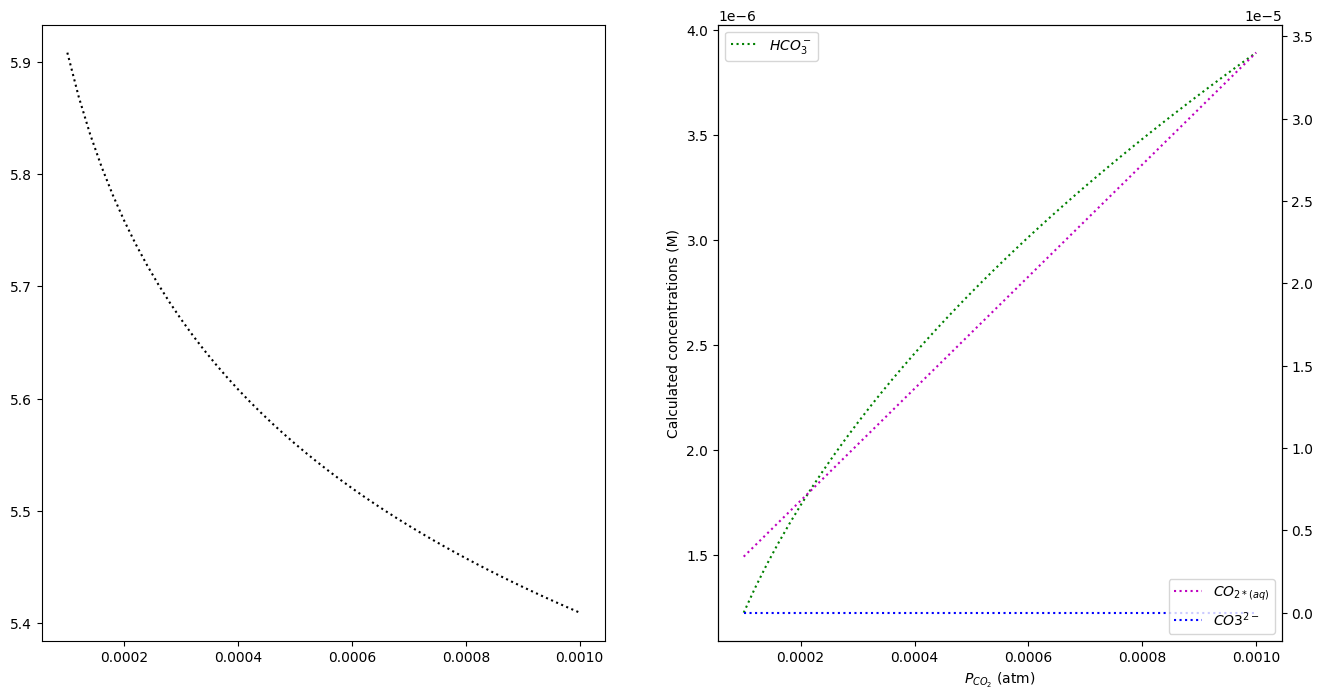

In [ ]:
#MODIFIED CODE TO MATCH NOTATION
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from google.colab import files

Kh=3.40e-2
Ka1=4.46e-7
Ka2=4.69e-11
Kw=1.0e-14
def f(x):
    f0=x[0]-(Kh)*(P) #Henry's Law, P is fixed - not adjustable
    f1=x[3]*x[1]-(Ka1*x[0]) #Ka1 of dissolved CO2 to bicarbonate
    f2=x[3]*x[2]-(Ka2)*x[1] #Ka2 of bicarbonate to carbonate
    f3=x[3]*x[4]-Kw #dissociation of water
    f4=x[1]+2*x[2]+x[4]-x[3] #charge balance
    return np.array([f0,f1,f2,f3,f4])

ppmvCO2=np.linspace(100,1000.0,46)
pressures=ppmvCO2/1.0e6
#pressures=np.arange(100.0,1000.0,1)
#pressures=np.array([402])
#create a Pandas dataFrame with a row for each pressure and columns for pressure, concentration of aqueous species, pH, and residuals
#pre-allocating the memory makes the loop run in reasonable time and makes it possible to insert values into the dataFrame using their index in each iteration of the loop using .iloc
dfResults=pd.DataFrame(index=ppmvCO2,columns=["P (atm)","[CO2*]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","pH","alkalinity","residuals"])

#for loop in which fsolve is performed iteratively for each value of pressure
for pressure,index in zip(pressures,range(len(pressures))):
    #initial guesses assuming independent equilibria
    P=pressure
    B=P*Kh #Calculates the initial dissolved CO2 using Henry's Law constant
    C=np.sqrt(Ka1*B) #initial guess for HCO3- concentration
    D=np.sqrt(Ka2*C) #initial guess for CO3 2- concentration
    E=C #initial guess for H+ concentration
    F=Kw/E #initial guess for OH- concentration
    x0=np.array([B,C,D,E,F]) #initial guess array

    x=fsolve(f,x0) #the fsolve function takes the array of 5 equations and solves for the 5 unknowns using the x0 array as initial guesses

    dfResults.iloc[index,0]=P #this puts the pressure of CO2 into the dataframe
    dfResults.iloc[index,1:6]=x #this puts the 6 concentrations into the dataframe (the notation "1:6" does not include the largest index and writes into indexes 1 to 5)
    dfResults.iloc[index,6]=-np.log10(x[3]) #this calculates the pH based on the solution for x[3]
    dfResults.iloc[index,7]=2*x[2]+x[1]+x[4]-x[3] #alkalinity is the proton accepting capacity
    dfResults.iloc[index,8]=np.sum(f(x)) #this sums up the values of all the functions in the f(x) array. Valid solutions will yield residuals of zero or almost zero.

#fig,ax=plt.subplots(figsize=(16,8))
#ax.plot(dfResults["P (atm)"],dfResults["pH"])
#ax.set_ylabel("Calculated pH")
#ax.set_xlabel(r"$P_{CO_2}$ (atm)")
#fig.show()
dfResults.to_excel("CO2 equilibrium results pure water.xlsx")
files.download("CO2 equilibrium results pure water.xlsx")

fig,[ax,ax2]=plt.subplots(1,2,figsize=(16,8))
ax.plot(dfResults["P (atm)"],dfResults["pH"],':k',label='pH')
ax3 = ax2.twinx()
ax3.plot(dfResults["P (atm)"],dfResults["[CO2*]"],':m',label=r'$CO_{2* (aq)}$')
ax2.plot(dfResults["P (atm)"],dfResults["[HCO3 -]"],':g',label=r'$HCO_3^-$')
ax3.plot(dfResults["P (atm)"],dfResults["[CO3 2-]"],':b',label=r'$CO3^{2-}$')
#ax2.plot(dfResults["P (atm)"],dfResults["[H +]"],':r',label='hydronium')
#x2.plot(dfResults["P (atm)"],dfResults["[OH -]"],':k',label='hydroxide')
#ax2.plot(dfResults["P (atm)"],dfResults["[Ca 2+]"],'m',label='calcium')
ax2.legend(loc=2)
ax3.legend(loc=4)
#ax.legend()
#ax.set_ylabel("Calculated pH")
#ax.set_xlabel(r"$P_{CO_2}$ (atm)")
ax2.set_ylabel("Calculated concentrations (M)")
ax2.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

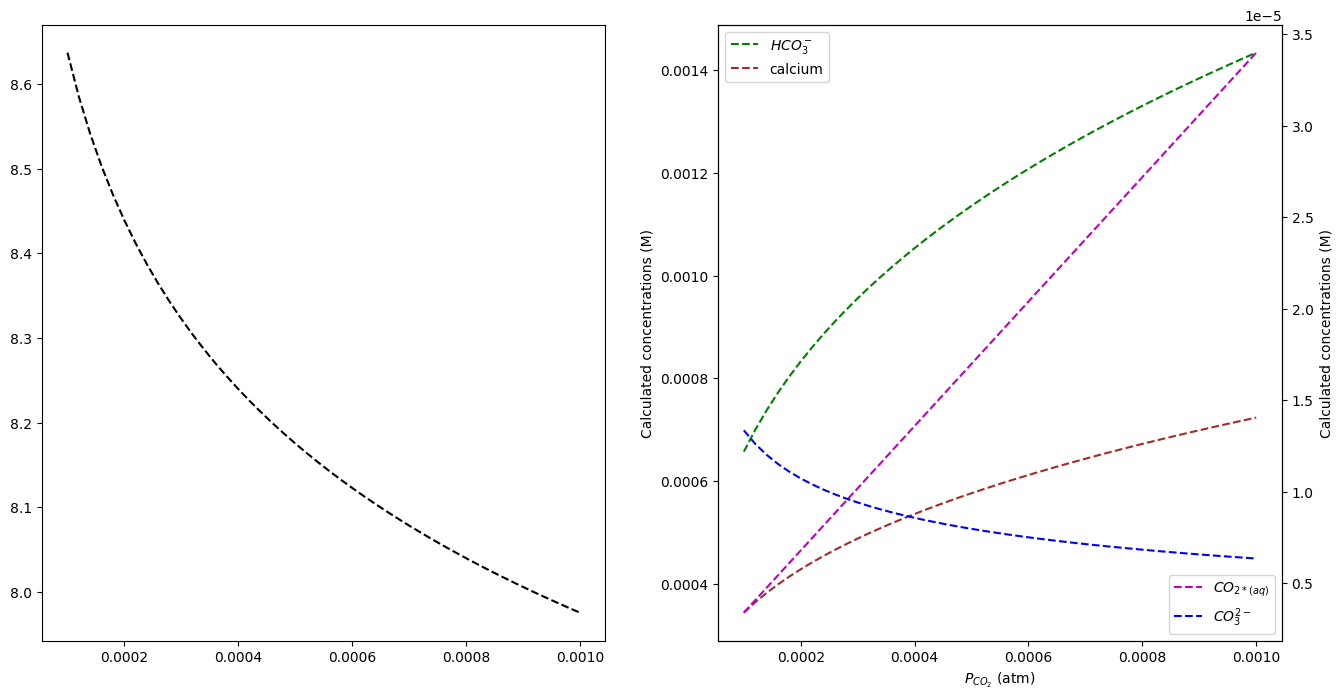

In [ ]:
#MODIFIED CODE TO ADD CALCITE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from google.colab import files

Kh=3.40e-2
Ka1=4.46e-7
Ka2=4.69e-11
Kw=1.0e-14
Ksp=4.6e-9
def f(x):
    f0=x[0]-(Kh)*(P) #Henry's Law, P is fixed - not adjustable
    f1=x[3]*x[1]-(Ka1*x[0]) #Ka1 of dissolved CO2 to bicarbonate
    f2=x[3]*x[2]-(Ka2)*x[1] #Ka2 of bicarbonate to carbonate
    f3=x[3]*x[4]-Kw #dissociation of water
    f4=x[2]*x[5]-Ksp #dissociation of calcium carbonate
    f5=x[1]+(2*x[2])+x[4]-x[3]-(2*x[5]) #charge balance
    return np.array([f0,f1,f2,f3,f4,f5])

ppmvCO2=np.linspace(100,1000.0,46)
pressures=ppmvCO2/1.0e6
#pressures=np.arange(100.0,1000.0,1)
#pressures=np.array([402])
#create a Pandas dataFrame with a row for each pressure and columns for pressure, concentration of aqueous species, pH, and residuals
#pre-allocating the memory makes the loop run in reasonable time and makes it possible to insert values into the dataFrame using their index in each iteration of the loop using .iloc
dfResults=pd.DataFrame(index=ppmvCO2,columns=["P (atm)","[CO2*]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","[Ca 2+]","pH","alkalinity","residuals"])

#for loop in which fsolve is performed iteratively for each value of pressure
for pressure,index in zip(pressures,range(len(pressures))):
    if index==0:
      #initial guesses assuming independent equilibria
      P=pressure
      B=P*Kh #Calculates the initial dissolved CO2 using Henry's Law constant
      E=10**-8.3 #initial guess for H+ concentration
      F=Kw/E #initial guess for OH- concentration
      C=Ka1*B/E #initial guess for HCO3- concentration
      D=Ka2*C/E #initial guess for CO3 2- concentration
      G=Ksp/D
      x0=np.array([B,C,D,E,F,G]) #initial guess array
    else:
      P=pressure
      x0=np.array(dfResults.iloc[index-1,1:7],dtype=float)
    x=fsolve(f,x0) #the fsolve function takes the array of 6 equations and solves for the 6 unknowns using the x0 array as initial guesses
    dfResults.iloc[index,0]=P #this puts the pressure of CO2 into the dataframe
    dfResults.iloc[index,1:7]=x #this puts the 6 concentrations into the dataframe (the notation "1:7" does not include the largest index and writes into indexes 1 to 6)
    dfResults.iloc[index,7]=-np.log10(x[3]) #this calculates the pH based on the solution for x[3]
    dfResults.iloc[index,8]=2*x[2]+x[1]+x[4]-x[3] #alkalinity is the proton accepting capacity
    dfResults.iloc[index,9]=np.sum(f(x)) #this sums up the values of all the functions in the f(x) array. Valid solutions will yield residuals of zero or almost zero.

#fig,ax=plt.subplots(figsize=(16,8))
#ax.plot(dfResults["P (atm)"],dfResults["pH"])
#ax.set_ylabel("Calculated pH")
#ax.set_xlabel(r"$P_{CO_2}$ (atm)")
#fig.show()
dfResults.to_excel("CO2 equilibrium results calcareous.xlsx")
files.download("CO2 equilibrium results calcareous.xlsx")

fig,[ax,ax2]=plt.subplots(1,2,figsize=(16,8))
ax.plot(dfResults["P (atm)"],dfResults["pH"],'--k',label='pH')
ax3 = ax2.twinx()
ax3.plot(dfResults["P (atm)"],dfResults["[CO2*]"],'--m',label=r'$CO_{2* (aq)}$')
ax2.plot(dfResults["P (atm)"],dfResults["[HCO3 -]"],'--g',label=r'$HCO_3^-$')
ax3.plot(dfResults["P (atm)"],dfResults["[CO3 2-]"],'--b',label=r'$CO_3^{2-}$')
#ax3.plot(dfResults["P (atm)"],dfResults["[H +]"],'--r',label='hydronium')
#ax3.plot(dfResults["P (atm)"],dfResults["[OH -]"],'--k',label='hydroxide')
ax2.plot(dfResults["P (atm)"],dfResults["[Ca 2+]"],'--',color='brown',label='calcium')
ax2.legend(loc=2)
ax3.legend(loc=4)
#ax.legend()
#ax.set_ylabel("Calculated pH")
#ax.set_xlabel(r"$P_{CO_2}$ (atm)")
ax2.set_ylabel("Calculated concentrations (M)")
ax3.set_ylabel("Calculated concentrations (M)")
ax2.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()

In [ ]:
#limestone only
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from google.colab import files

Kh=3.40e-2
Ka1=4.46e-7
Ka2=4.69e-11
Kw=1.0e-14
Ksp=4.6e-9
def f(x):
    f0=x[3]*x[1]-(Ka1*x[0]) #Ka1 of dissolved CO2 to bicarbonate
    f1=x[3]*x[2]-(Ka2)*x[1] #Ka2 of bicarbonate to carbonate
    f2=x[3]*x[4]-Kw #dissociation of water
    f3=x[2]*x[5]-Ksp #dissociation of calcium carbonate
    f4=x[1]+(2*x[2])+x[4]-x[3]-(2*x[5]) #charge balance
    f5=x[0]+x[1]+x[2]-x[5] #mass balance
    return np.array([f0,f1,f2,f3,f4,f5])

ppmvCO2=np.linspace(100,1000.0,46)
pressures=ppmvCO2/1.0e6
#pressures=np.arange(100.0,1000.0,1)
#pressures=np.array([402])
#create a Pandas dataFrame with a row for each pressure and columns for pressure, concentration of aqueous species, pH, and residuals
#pre-allocating the memory makes the loop run in reasonable time and makes it possible to insert values into the dataFrame using their index in each iteration of the loop using .iloc
#dfResults=pd.DataFrame(index=ppmvCO2,columns=["P (atm)","[CO2*]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","pH","alkalinity","residuals"])

#for loop in which fsolve is performed iteratively for each value of pressure
#for pressure,index in zip(pressures,range(len(pressures))):
    #initial guesses assuming independent equilibria
B=0
E=10**-10 #initial guess for H+ concentration
F=Kw/E #initial guess for OH- concentration
C=E*D/Ka2 #initial guess for HCO3- concentration
D=np.sqrt(Ksp) #initial guess for CO3 2- concentration
G=np.sqrt(Ksp)
x0=np.array([B,C,D,E,F,G]) #initial guess array

x=fsolve(f,x0) #the fsolve function takes the array of 5 equations and solves for the 5 unknowns using the x0 array as initial guesses
print(x)
print('pH = ',-np.log10(x[3]))



[2.24101435e-08 8.84762352e-05 3.67321725e-05 1.12967329e-10
 8.85211684e-05 1.25230818e-04]
pH =  9.947047137817952


In [ ]:
#Part IV: Insert code that defines f(x) as an array of functions f0 - f5
#Part V: insert code that calculates initial estimates for each aqueous species given the atmospheric partial pressure of CO2
#Part VI:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

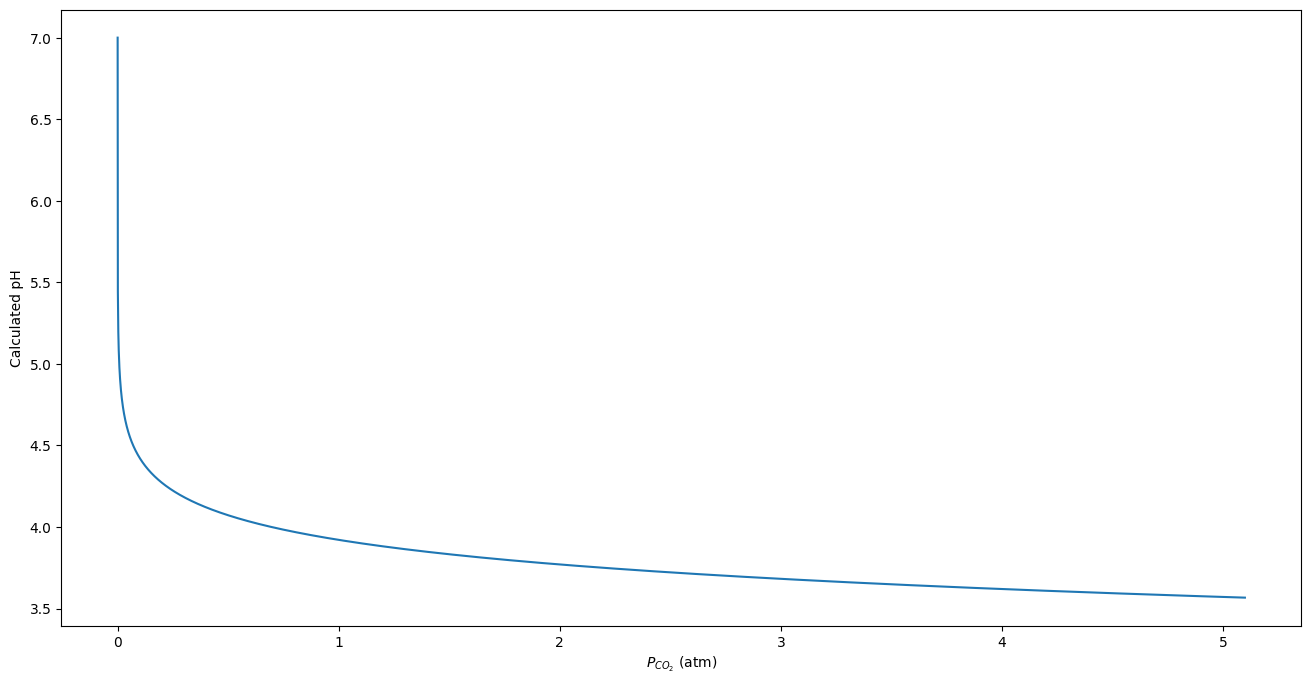

In [ ]:
#OLDER CODE CELL
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from google.colab import files

def f(x):
    f0=x[1]-(1.7e-3)*(x[0]) #these two are often combined
    f1=x[4]*x[2]-(2.5e-4)*x[1] # to give Ka1 of 4.46e-7
    f2=x[4]*x[3]-(4.69e-11)*x[2]
    f3=x[4]*x[5]-1.0e-14
    f4=x[2]+2*x[3]+x[5]-x[4]
    f5=x[0]+x[1]+x[2]+x[3]-B
    return np.array([f0,f1,f2,f3,f4,f5])

#creates an array for the initial partial pressure of CO2 in atm with a range of 0 to 5 atm and step size 0.001
#must use numpy arange() because range() only allows integers
#P=np.array(np.arange(0,5.1,0.001))
#further defines low pressure and high pressure ranges with different step sizes
#pressures=np.arange(0,0.1,0.001)
#pressures=np.arange(0.1,5.1,0.1)

#creates an array for the initial partial pressure of CO2 in atm with a range of 0 to 5 atm and step size 0.001
pressures=np.arange(0,5.1,0.001)

#create a Pandas dataFrame with a row for each pressure and columns for pressure, concentration of aqueous species, pH, and residuals
#pre-allocating the memory makes the loop run in reasonable time and makes it possible to insert values into the dataFrame using their index in each iteration of the loop using .iloc
dfResults=pd.DataFrame(index=pressures,columns=["P","[CO2]","[H2CO3]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","pH","residuals"])

#for loop in which fsolve is performed iteratively for each value of pressure
for pressure,index in zip(pressures,range(len(pressures))):
    #initial guesses assuming independent equilibria
    B=pressure*0.034 #Calculates the initial dissolved CO2 using Henry's Law constant
    C=0.0017*B #initial guess for H2CO3 concentration
    D=np.sqrt(0.00025*C) #initial guess for HCO3- concentration
    E=np.sqrt(4.69e-11*D) #initial guess for CO3 2- concentration
    F=np.sqrt(1e-14) #initial guess for H+ concentration
    G=np.sqrt(1e-14) #initial guess for OH- concentration
    x0=np.array([B,C,D,E,F,G]) #initial guess array

    x=fsolve(f,x0) #the fsolve function takes the array of 6 equations and solves for the 6 unknowns using the x0 array as initial guesses

    dfResults.iloc[index,0]=pressure #this puts the pressure of CO2 into the dataframe
    dfResults.iloc[index,1:7]=x #this puts the 6 concentrations into the dataframe (the notation "1:7" does not include the largest index and writes into indexes 1 to 6)
    dfResults.iloc[index,7]=-np.log10(x[4]) #this calculates the pH based on the solution for x[4]
    dfResults.iloc[index,8]=np.sum(f(x)) #this sums up the values of all the functions in the f(x) array. Valid solutions will yield residuals of zero or almost zero.

fig,ax=plt.subplots(figsize=(16,8))
ax.plot(dfResults["P"],dfResults["pH"])
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()
dfResults.to_excel("CO2 equilibrium results.xlsx")
files.download("CO2 equilibrium results.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                 P [CO2_H2CO3]  [HCO3 -]  [CO3 2-] [H +]    [OH -]   [Ca 2+]  \
0.000100    0.0001    0.000003  0.000659  0.000013   0.0  0.000004  0.000345   
0.000101  0.000101    0.000003  0.000661  0.000013   0.0  0.000004  0.000346   
0.000102  0.000102    0.000003  0.000663  0.000013   0.0  0.000004  0.000347   
0.000103  0.000103    0.000004  0.000666  0.000013   0.0  0.000004  0.000348   
0.000104  0.000104    0.000004  0.000668  0.000013   0.0  0.000004  0.000349   
...            ...         ...       ...       ...   ...       ...       ...   
0.000995  0.000995    0.000034  0.001434  0.000006   0.0  0.000001  0.000724   
0.000996  0.000996    0.000034  0.001435  0.000006   0.0  0.000001  0.000724   
0.000997  0.000997    0.000034  0.001435  0.000006   0.0  0.000001  0.000725   
0.000998  0.000998    0.000034  0.001436  0.000006   0.0  0.000001  0.000725   
0.000999  0.000999    0.000034  0.001436  0.000006   0.0  0.000001  0.000725   

                pH residuals  
0.000100

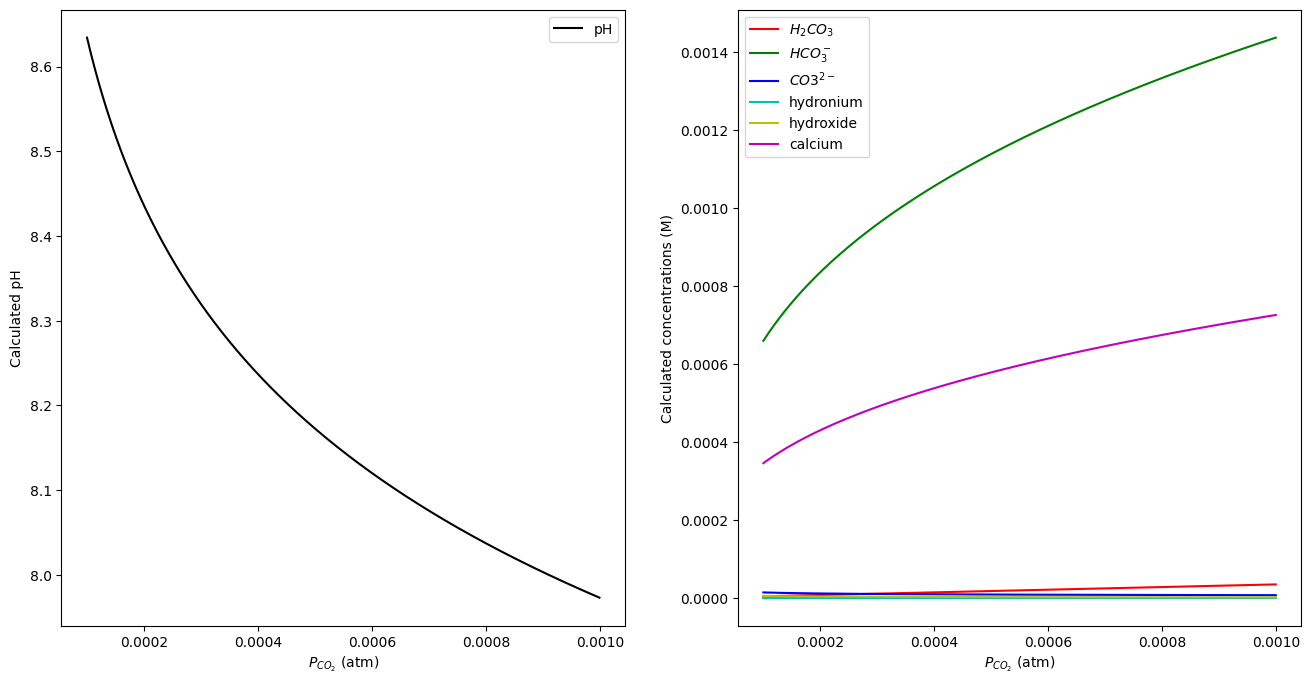

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
!pip install xlsxwriter
import xlsxwriter as xlsx
from google.colab import files

flgCorrectForTempAndSal=False

if flgCorrectForTempAndSal==True:
    temp=25+273.15
    sal=35

    eqKo=np.exp(93.4517*(100/temp)-60.2409+23.3585*np.log(temp/100)+sal*(0.023517-0.023656*(temp/100)+0.004736*(temp/100)**2))
    print("K0 = "+str(eqKo))
    eqK1=10**( (-3633.86/temp) + 61.2172 - 9.67770*np.log(temp) + 0.011555*sal - 0.0001152*sal**2 )
    #print(-np.log10(eqK1))
    print("Ka1 = "+str(eqK1))
    eqK2=10**( (-471.78/temp) - 25.9290 + 3.16967*np.log(temp) + 0.01781*sal - 0.0001122*sal**2 )
    #print(-np.log10(eqK2))
    print("Ka2 = "+str(eqK2))
    eqKw=np.exp(-13847.26/temp+148.9652-23.6531*np.log(temp)+(118.67/temp-5.977+1.0495*np.log(temp))*sal**(1/2)-0.01615*sal)
    print("Kw = "+str(eqKw))
    eqKspCalcite=10**( -171.9065 - 0.077993*temp + 2839.319/temp + 71.595*np.log10(temp) + (-0.77712+0.0028426*temp+178.34/temp)*sal**(1/2) - 0.07711*sal + 0.0041249*sal**1.5 )
    print("Ksp calcite = "+str(eqKspCalcite))
    eqK2effSea = 10**-(1394.7/temp + 4.77 - 0.0184*sal + 0.000118*sal**2)
    print("K0 = "+str(eqK2effSea))
else:
    eqKo=3.4e-2
    eqK1=4.5e-7
    eqK2=4.7e-11
    eqKspCalcite=4.6e-9
    eqKw=1.0e-14

def carbonDioxideInSeawaterPos(concs):
  #fugacityCO2=concs[0]
  carbonicAndDissolvedCO2=concs[0]**2
  bicarbonate=concs[1]**2
  carbonate=concs[2]**2
  hydronium=concs[3]**2
  hydroxide=concs[4]**2
  calcium=concs[5]**2
  henry=carbonicAndDissolvedCO2/fugacityCO2**2-eqKo**2
  acid1=hydronium*bicarbonate/carbonicAndDissolvedCO2-eqK1**2
  acid2=hydronium*carbonate/bicarbonate-eqK2**2
  autodissociation=hydronium*hydroxide-eqKw**2
  #massBalanceCarbon=carbonicAndDissolvedCO2+bicarbonate+carbonate-(fugacityCO2*eqKo)
  chargeBalance=bicarbonate+2**2*carbonate+hydroxide-hydronium-2**2*calcium
  calcite=calcium*carbonate-eqKspCalcite**2
  #return np.array([henry,acid1,acid2,autodissociation,massBalanceCarbon,chargeBalance])
  return np.array([henry,acid1,acid2,autodissociation,chargeBalance,calcite])

def carbonDioxideInSeawater(concs):
  #fugacityCO2=concs[0]
  carbonicAndDissolvedCO2=concs[0]
  bicarbonate=concs[1]
  carbonate=concs[2]
  hydronium=concs[3]
  hydroxide=concs[4]
  calcium=concs[5]
  henry=carbonicAndDissolvedCO2/fugacityCO2-eqKo
  acid1=hydronium*bicarbonate/carbonicAndDissolvedCO2-eqK1
  acid2=hydronium*carbonate/bicarbonate-eqK2
  autodissociation=hydronium*hydroxide-eqKw
  #massBalanceCarbon=carbonicAndDissolvedCO2+bicarbonate+carbonate-(fugacityCO2*eqKo)
  chargeBalance=bicarbonate+2*carbonate+hydroxide-hydronium-2*calcium
  calcite=calcium*carbonate-eqKspCalcite
  #return np.array([henry,acid1,acid2,autodissociation,massBalanceCarbon,chargeBalance])
  returnVals=np.array([henry,acid1,acid2,autodissociation,chargeBalance,calcite])
  return returnVals

pressures=np.arange(100.0,1000.0,1)/1e6
dfResults=pd.DataFrame(index=pressures,columns=["P","[CO2_H2CO3]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","[Ca 2+]","pH","residuals"])

for pressure,index in zip(pressures,range(len(pressures))):
  #pressure=410.0/1e6
  if index==0:
      fugacityCO2=pressure
      # carbonicAndDissolvedCO2=pressure*eqKo
      # bicarbonate=np.sqrt(eqK1*carbonicAndDissolvedCO2)
      # carbonate=np.sqrt(eqK2*bicarbonate)
      # hydronium=2e-9
      # hydroxide=eqKw/hydronium
      # calcium=np.sqrt(eqKspCalcite)
      # intialGuesses=np.array([carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium])
      intialGuesses=np.array([3.40000000e-06, 6.58885243e-04, 1.33360124e-05, 2.32210391e-09, 4.30643949e-06, 3.44930692e-04])
  else:
      fugacityCO2=pressure
      intialGuesses=np.array(dfResults.iloc[index-1,1:7],dtype=float)

  #fsolve
  [carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]=fsolve(carbonDioxideInSeawater,intialGuesses)
  #[carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]=fsolve(carbonDioxideInSeawaterPos,intialGuesses)
  dfResults.iloc[index,0]=pressure
  dfResults.iloc[index,1]=carbonicAndDissolvedCO2
  dfResults.iloc[index,2]=bicarbonate
  dfResults.iloc[index,3]=carbonate
  dfResults.iloc[index,4]=hydronium
  dfResults.iloc[index,5]=hydroxide
  dfResults.iloc[index,6]=calcium
  dfResults.iloc[index,7]=-np.log10(hydronium)
  dfResults.iloc[index,8]=np.sum(carbonDioxideInSeawater([carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]))

fig,[ax,ax2]=plt.subplots(1,2,figsize=(16,8))
ax.plot(dfResults["P"],dfResults["pH"],'k',label='pH')
ax2.plot(dfResults["P"],dfResults["[CO2_H2CO3]"],'r',label=r'$H_2CO_3$')
ax2.plot(dfResults["P"],dfResults["[HCO3 -]"],'g',label=r'$HCO_3^-$')
ax2.plot(dfResults["P"],dfResults["[CO3 2-]"],'b',label=r'$CO3^{2-}$')
ax2.plot(dfResults["P"],dfResults["[H +]"],'c',label='hydronium')
ax2.plot(dfResults["P"],dfResults["[OH -]"],'y',label='hydroxide')
ax2.plot(dfResults["P"],dfResults["[Ca 2+]"],'m',label='calcium')
ax2.legend()
ax.legend()
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
ax2.set_ylabel("Calculated concentrations (M)")
ax2.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()
dfResults.to_excel("CO2 Equilibrium Results.xlsx")
files.download("CO2 Equilibrium Results.xlsx")
print(dfResults)